## REGULARIZATION - LASSO (L1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Ames_Housing_Clean_Data(remove skew).csv')

x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [3]:
y

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2830    377.491722
2831    361.939221
2832    363.318042
2833    412.310563
2834    433.589668
Name: SalePrice, Length: 2835, dtype: float64

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()

In [6]:
scaler.fit(x_train)

StandardScaler()

In [7]:
x_train=scaler.transform(x_train)

In [8]:
x_test=scaler.transform(x_test)

In [9]:
from sklearn.linear_model import LassoCV

In [10]:
lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [11]:
lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=5, eps=0.1)

In [12]:
lasso_cv_model.alpha_

6.481382869014167

In [13]:
test_pred=lasso_cv_model.predict(x_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

387.70619853740993

In [16]:
MSE=mean_squared_error(y_test,test_pred)

MSE**2

471553.2882692185

In [17]:
RMSE=np.sqrt(MSE)

RMSE=RMSE**2

RMSE

686.6973775027967

In [18]:
## train performance

train_predictions=lasso_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_predictions)
MAE**2

416.3141260789489

In [19]:
df['SalePrice'].mean()**2

169955.60105924687

In [20]:
RMSE*100/df['SalePrice'].mean()**2

0.4040451583960523

0.4% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [21]:
test_res=y_test-test_pred

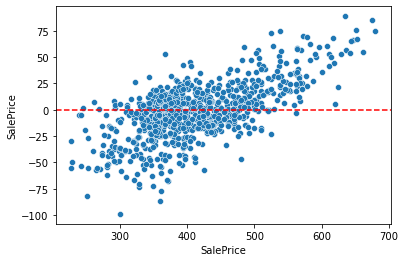

In [22]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

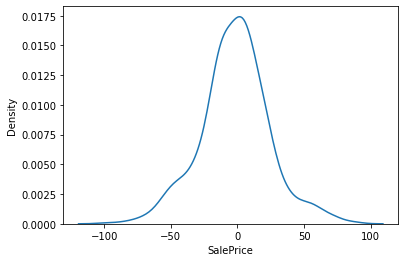

In [23]:
sns.kdeplot(test_res);

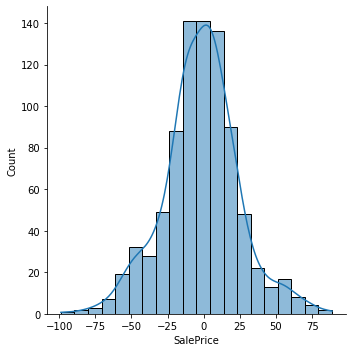

In [24]:
sns.displot(test_res,bins=20,kde=True);

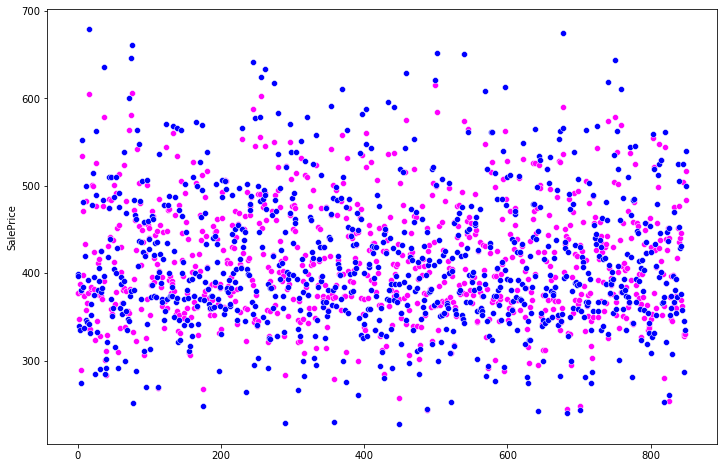

In [25]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(test_pred)),y=test_pred,color='magenta')
sns.scatterplot(x=range(len(y_test)),y=y_test,color='blue');

**Test 3 - Probability Plot**

In [26]:
import scipy as sp

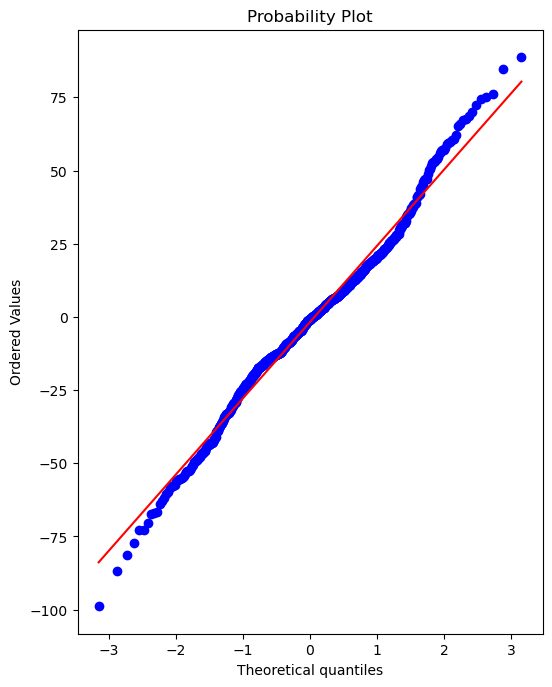

In [27]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [28]:
lasso_cv_model.coef_

array([ 0.38524156,  0.20688335,  0.        ,  0.        , 21.1606324 ,
        0.        ,  4.28206042,  1.89084758,  0.        , -4.93050123,
       -0.        , -2.68415903, -0.        , -1.26511595,  6.17224598,
        0.        , -0.        ,  5.70241612, -0.39537473, -0.        ,
        2.83142585,  0.        , -0.        , 20.29314719,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -5.66190711,  0.        ,  0.        , -3.35945074,  0.        ,
       -1.10427349,  3.32054643,  4.62146682, -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -1.38

**direct method to filter useful features through lasso**

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

**re train with only features provide by lasso**

In [29]:
lasso_coef=lasso_cv_model.coef_

In [30]:
lasso_coef[lasso_coef>0]

array([ 0.38524156,  0.20688335, 21.1606324 ,  4.28206042,  1.89084758,
        6.17224598,  5.70241612,  2.83142585, 20.29314719,  3.32054643,
        4.62146682,  0.36269954])

In [31]:
np.where(lasso_coef>0)

(array([  0,   1,   4,   6,   7,  14,  17,  20,  23,  36,  37, 223],
       dtype=int64),)

In [32]:
lasso_coef.shape

(232,)

In [33]:
df.columns[[0,1,4,6,7,14,17,20,23,36,37]]

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [34]:
x=df[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area']]
y=df['SalePrice']

In [35]:
x

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area
0,141.000000,31770,6,1960,1960,639.0,1080.0,1656,1656,2.0,528.0
1,80.000000,11622,5,1961,1961,468.0,882.0,896,896,1.0,730.0
2,81.000000,14267,6,1958,1958,923.0,1329.0,1329,1329,1.0,312.0
3,93.000000,11160,7,1968,1968,1065.0,2110.0,2110,2110,2.0,522.0
4,74.000000,13830,5,1997,1998,791.0,928.0,928,1629,2.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...
2830,37.000000,7937,6,1984,1984,819.0,1003.0,1003,1003,2.0,588.0
2831,75.157303,8885,5,1983,1983,301.0,864.0,902,902,2.0,484.0
2832,62.000000,10441,5,1992,1992,337.0,912.0,970,970,0.0,0.0
2833,77.000000,10010,5,1974,1975,1071.0,1389.0,1389,1389,2.0,418.0


In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
final_scaler=StandardScaler()

In [39]:
final_scaler.fit(x_train)

StandardScaler()

In [40]:
x_train=final_scaler.transform(x_train)

In [41]:
x_test=final_scaler.transform(x_test)

In [42]:
from sklearn.linear_model import LassoCV

In [43]:
final_lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [44]:
final_lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=5, eps=0.1)

In [45]:
final_lasso_cv_model.alpha_

6.481382869014167

In [46]:
test_pred=final_lasso_cv_model.predict(x_test)

In [47]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

415.9664989100924

In [48]:
MSE=mean_squared_error(y_test,test_pred)

MSE**2

576014.4134920478

In [49]:
RMSE=np.sqrt(MSE)

RMSE=RMSE**2

RMSE

758.9561341026553

In [50]:
## train performance

train_predictions=final_lasso_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_predictions)
MAE**2

466.5683637196087

In [51]:
df['SalePrice'].mean()**2

169955.60105924687

In [52]:
RMSE*100/df['SalePrice'].mean()**2

0.44656141331763555

0.45% percent of error percentage for predicting sales price

**Test 2 - Residual Plot and Distribution Plot**

In [53]:
test_res=y_test-test_pred

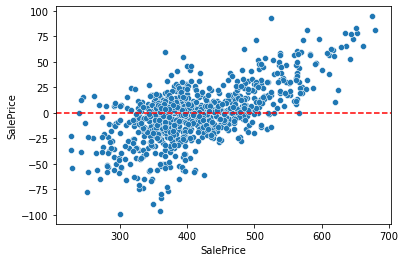

In [54]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

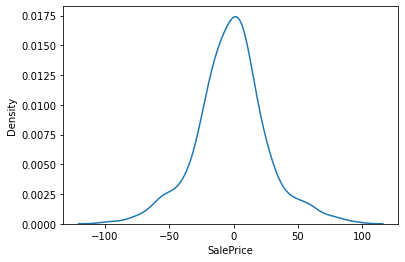

In [55]:
sns.kdeplot(test_res);

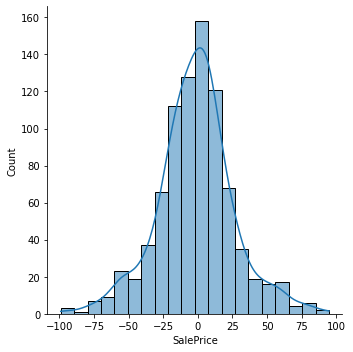

In [56]:
sns.displot(test_res,bins=20,kde=True);

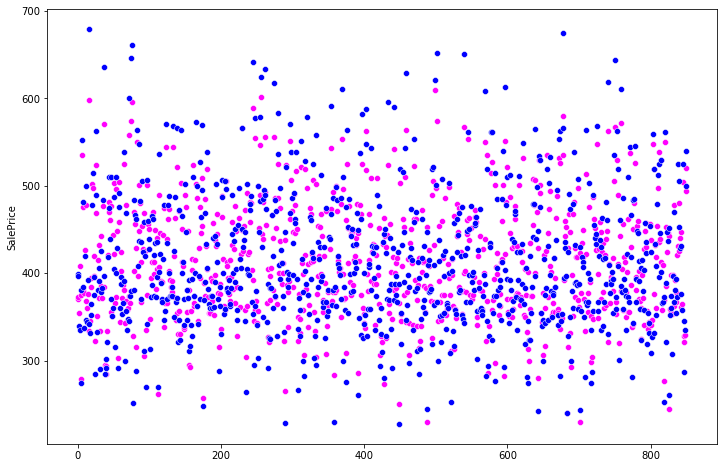

In [57]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(test_pred)),y=test_pred,color='magenta')
sns.scatterplot(x=range(len(y_test)),y=y_test,color='blue');

**Test 3 - Probability Plot**

In [58]:
import scipy as sp

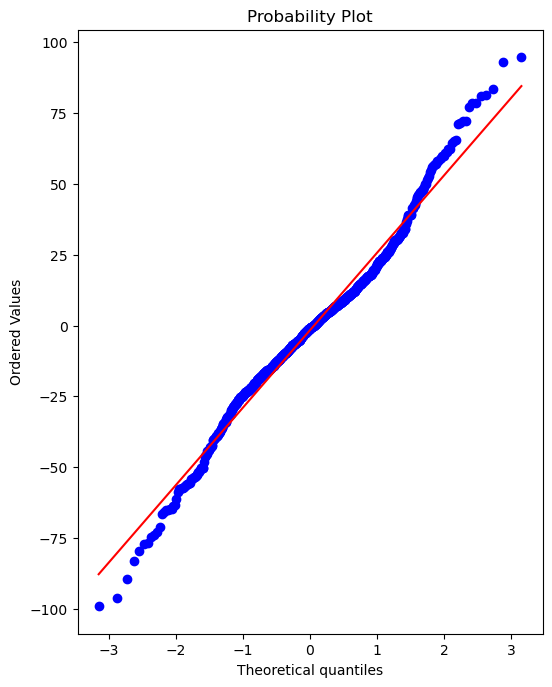

In [59]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [60]:
final_lasso_cv_model.coef_

array([ 0.66387436,  0.67020923, 27.72665934,  7.14259528,  4.94690188,
        6.88348461,  7.92993675,  2.33961594, 21.3267563 ,  4.16073913,
        4.73124932])

## model deployment

In [61]:
from joblib import dump, load

In [62]:
dump(final_scaler,'ames_scaler.pkl')

['ames_scaler.pkl']

In [63]:
dump(final_lasso_cv_model,'ames_model.h5')

['ames_model.h5']

In [64]:
sale_price_example={'Lot Frontage':8,
                   'Lot Area':3000,
                   'Overall Qual':5,
                   'Year Built':1998,
                   'Year Remod.Add':2000,
                   'BsmtFin SF 1':400,
                   'Total Bsmt SF':1000,
                   '1st Flr SF':1000,
                   'Gr Liv Area':1000,
                   'Garage Cars':3.0,
                   'Garage Area':500,
                   }

In [65]:
from joblib import dump, load

sale_price_model = load('ames_model.h5')

sale_price_scaler = load('ames_scaler.pkl')

def return_prediction(model,scaler,sample_json):
    
    lot_front = sample_json['Lot Frontage']
    lot_area = sample_json['Lot Area']
    ovr_qual = sample_json['Overall Qual']
    yr_built = sample_json['Year Built']
    yr_remod = sample_json['Year Remod/Add']
    bsmt_fin = sample_json['BsmtFin SF 1']
    t_bsmt_sf = sample_json['Total Bsmt SF']
    first_flr_sf = sample_json['1st Flr SF']
    gr_liv_area = sample_json['Gr Liv Area']
    gr_cars = sample_json['Garage Cars']
    gr_area = sample_json['Garage Area']
        
    
    sale_price = [[lot_front,lot_area,ovr_qual,yr_built,yr_remod,bsmt_fin,
                   t_bsmt_sf,first_flr_sf,gr_liv_area,gr_cars,gr_area,sal_typ_conlw]]
    
    sale_price = scaler.transform(sale_price)
    
    prediction= model.predict(sale_price**2)
    
    prediction = np.round(prediction,2)
        
    return prediction[0]